In [1]:
import matplotlib
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("Pandas version:{}\nNumpy version:{}\n".format(pd.__version__, np.__version__))

Pandas version:0.17.1
Numpy version:1.10.1



In [3]:
data_file = open("data/ta_feng_dataset/D01")
data = pd.read_csv(data_file,';',skiprows=[2,3,4,5,6,7,8],names=['Date','Customer_Id','Age','Area','Product_Class','Product_Id','Amount','Assets','Price'])
data.head()

,Date,Customer_Id,Age,Area,Product_Class,Product_Id,Amount,Assets,Price
0,2001-01-01 00:00:00,141833,F,F,130207,4710105011011,2,44,52
1,2001-01-01 00:00:00,1376753,E,E,110217,4710265849066,1,150,129
2,2001-01-03 00:00:00,956710,E,E,500303,4710367208648,1,36,59
3,2001-01-04 00:00:00,477796,E,H,100108,50853991,2,220,270
4,2001-01-05 00:00:00,1267471,C,F,500804,9310022733406,1,185,218


In [4]:
data.shape

(216857, 9)

In [5]:
unrelated_columns = range(2,9)
data = data.drop(data.columns[unrelated_columns],axis=1)
data.head()
# data.plot(kind='scatter', y='Amount', x='Customer_Id')

,Date,Customer_Id
0,2001-01-01 00:00:00,141833
1,2001-01-01 00:00:00,1376753
2,2001-01-03 00:00:00,956710
3,2001-01-04 00:00:00,477796
4,2001-01-05 00:00:00,1267471


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Customer_Id
0,2001-01-01,141833
1,2001-01-01,1376753
2,2001-01-03,956710
3,2001-01-04,477796
4,2001-01-05,1267471


In [12]:
data_count = data.groupby('Date').count()
data_count.rename(columns={'Customer_Id':'People_count','Date':'Date'},inplace=True)
data_count

,People_count
Date,
2001-01-01,11317
2001-01-02,5179
2001-01-03,1647
2001-01-04,1418
2001-01-05,1142
2001-01-06,3713
2001-01-07,4884
2001-01-08,4984
2001-01-09,3726


In [13]:
data_count['Date'] = data_count.index
data_count['Index'] = range(1, len(data_count) + 1)
data_count = data_count.set_index('Index')

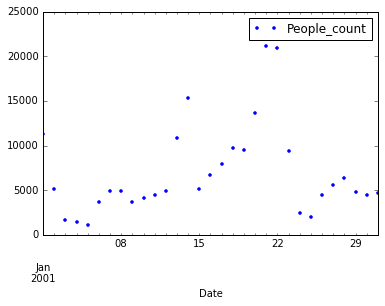

In [14]:
data_count.plot(x='Date',y='People_count',style=".")

In [15]:
data_count['from_beg'] = range(1,len(data_count)+1)
data_count

,People_count,Date,from_beg
Index,,,
1,11317,2001-01-01,1
2,5179,2001-01-02,2
3,1647,2001-01-03,3
4,1418,2001-01-04,4
5,1142,2001-01-05,5
6,3713,2001-01-06,6
7,4884,2001-01-07,7
8,4984,2001-01-08,8
9,3726,2001-01-09,9


In [ ]:
lm = smf.ols(formula='People_count ~ from_beg', data=data_count).fit()
lm.params

In [24]:
x_new = pd.DataFrame({'from_beg': [data_count['from_beg'].min(), data_count['from_beg'].max()]})
x_new

,from_beg
0,1
1,31


In [25]:
preds = lm.predict(x_new)
preds

array([ 5491.90927419,  8498.86491935])

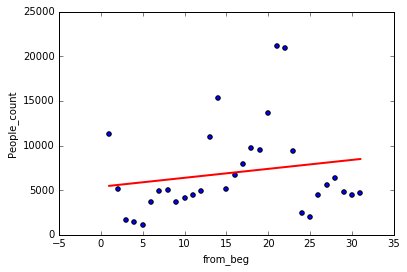

In [26]:

# first, plot the observed data
data_count.plot(kind='scatter', x='from_beg', y='People_count')

# then, plot the least squares line
plt.plot(x_new, preds, c='red', linewidth=2)